In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

In [3]:
rs = 1234

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.shape

(569, 33)

In [18]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [20]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df["Unnamed: 32"].value_counts()

Series([], Name: Unnamed: 32, dtype: int64)

In [7]:
df.drop("Unnamed: 32", axis=1, inplace=True)

In [8]:
df.columns.tolist()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [25]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.loc[(df["diagnosis"]=="M"), "diagnosis_binary"] = 1

In [10]:
df.loc[(df["diagnosis"]=="B"), "diagnosis_binary"] = 0

In [11]:
df.drop("diagnosis", axis=1, inplace=True)

In [12]:
df.groupby(df["diagnosis_binary"]).mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis_binary,,,,,,,,,,,,,,,,,,,,,
0.0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1.0,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


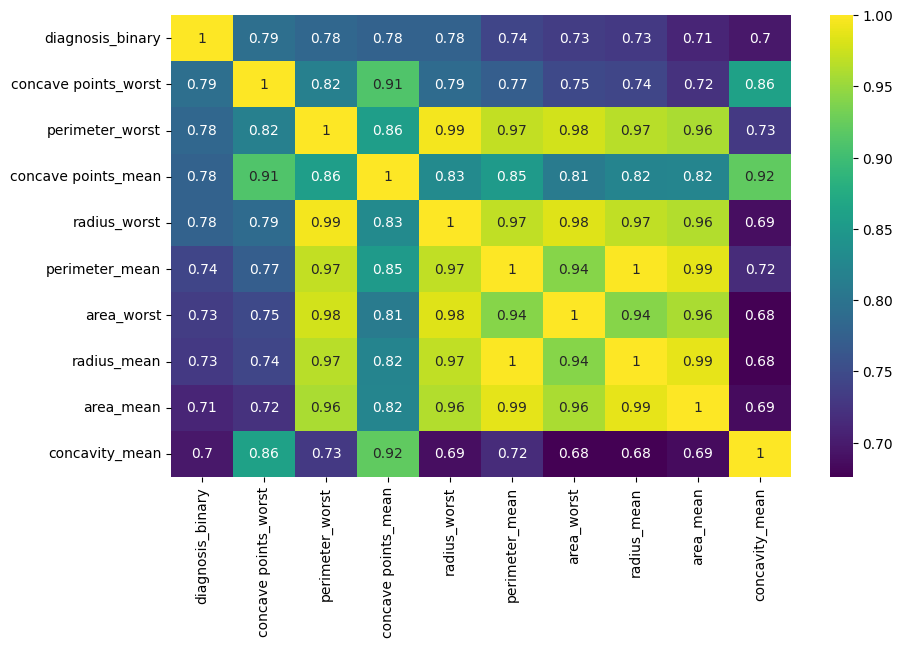

In [41]:
k = 10
cols = df.corr().nlargest(k, 'diagnosis_binary')['diagnosis_binary'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis'); 

In [13]:
columns_to_drop = ["id", "diagnosis_binary"]

In [14]:
X = df.drop(columns=columns_to_drop)
y = df["diagnosis_binary"]

In [34]:
X.columns.tolist()

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [38]:
y[:10]

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: diagnosis_binary, dtype: float64

In [42]:
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.20,
                                                    random_state=rs,
                                                    stratify = y)

rfc = RandomForestClassifier(n_estimators = 100, # default is 100 for class and time, make it 50
                             min_samples_split = 200, 
                             random_state=rs)

rfc.fit(X_train, y_train)
rfc.score(X_train, y_train), rfc.score(X_test,y_test)

(0.945054945054945, 0.9385964912280702)

In [42]:
from sklearn.metrics import RocCurveDisplay

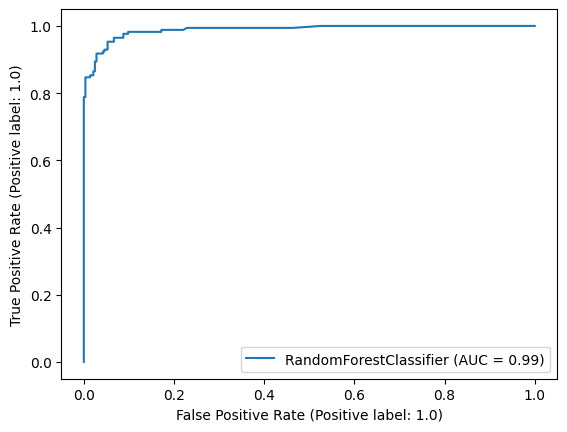

In [46]:
RocCurveDisplay.from_estimator(rfc, X_train, y_train);

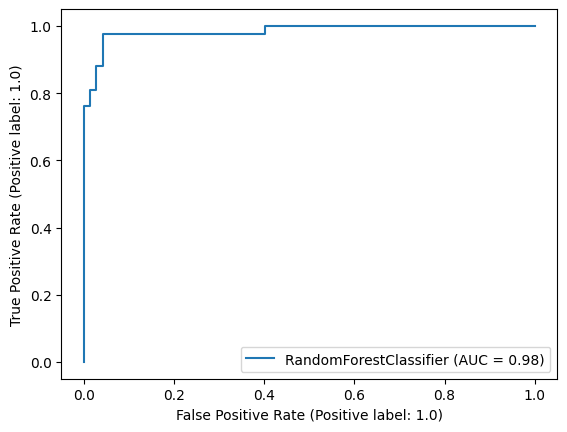

In [47]:
RocCurveDisplay.from_estimator(rfc, X_test, y_test);

In [49]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 200,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [10]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [52]:
param_grid = {"n_estimators": np.arange(10, 50, 5),
              "max_depth": np.arange(1,10,2),
              "min_samples_split": np.arange(1, 30, 5),
              "class_weight": ["balanced"]}



## Run the Grid search
sh = HalvingGridSearchCV(rfc,
                         param_grid,
                         cv=5,
                         factor=2, # The ‘halving’ parameter, which determines the proportion of  
                                   # candidates that are selected for each subsequent iteration.
                         resource='n_samples', # Defines the resource that increases with each iteration:
                                               #n_samples, n_iterations, n_estimators, or any parameter   #n_samples if enough data
                         max_resources=50,
                        random_state = rs).fit(X_train, y_train)
sh.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=7,
                       min_samples_split=11, n_estimators=35,
                       random_state=1234)

In [53]:
rfc = sh.best_estimator_

rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7,
                       min_samples_split=11, n_estimators=35,
                       random_state=1234)

In [57]:
rfc.score(X_train, y_train), rfc.score(X_test, y_test)

(0.9956043956043956, 0.9736842105263158)

In [38]:
from sklearn.metrics import classification_report

In [60]:
# Predict labels on test data
y_pred = rfc.predict(X_test)

# Compute classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        72
         1.0       0.95      0.98      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [61]:
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(rfc, X_train, y_train, scoring=scoring)
scores['test_recall_macro'].mean(), scores['test_precision_macro'].mean()

(0.9430856553147574, 0.9407779518309114)

In [62]:
scores = cross_validate(rfc, X_test, y_test, scoring=scoring)
scores['test_recall_macro'].mean(), scores['test_precision_macro'].mean()

(0.930515873015873, 0.9242521367521366)

## Boosting Methods:

In [26]:
from sklearn.ensemble import GradientBoostingClassifier


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state=rs)

clf = GradientBoostingClassifier(n_estimators=30, 
                                 learning_rate=.5, # Learning rate shrinks the contribution of each tree by learning_rate. 
                                                 # There is a trade-off between learning_rate and n_estimators. #a value between 0 and 1
                                 max_depth=2, 
                                 random_state=rs).fit(X_train, y_train)


clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.9649122807017544)

In [28]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

clf = GradientBoostingClassifier(n_estimators=30,
                                 random_state=rs)

## Parameter Grid
param_grid = {'learning_rate': np.arange(0.1,1, 0.2),
              'min_samples_split': np.arange(20,100,10)}

## Run the Grid search
sh = HalvingGridSearchCV(clf,
                         param_grid,
                         cv=5,
                         factor=2, 
                         resource='n_estimators',## With Ensembles, we are best to set this as the number of estimators
                                                 ## Especially for RFR, where n_samples will give us errors with not enough samples
                         max_resources=100,
                         verbose = 1,
                         random_state = rs,).fit(X_train, y_train) ## Verbose will give us some output
sh.best_estimator_

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 3
max_resources_: 100
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 40
n_resources: 3
Fitting 5 folds for each of 40 candidates, totalling 200 fits
----------
iter: 1
n_candidates: 20
n_resources: 6
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 2
n_candidates: 10
n_resources: 12
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 3
n_candidates: 5
n_resources: 24
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 4
n_candidates: 3
n_resources: 48
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 5
n_candidates: 2
n_resources: 96
Fitting 5 folds for each of 2 candidates, totalling 10 fits


GradientBoostingClassifier(learning_rate=0.7000000000000001,
                           min_samples_split=70, n_estimators=96,
                           random_state=1234)

In [29]:
clf = sh.best_estimator_

clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test) 

(1.0, 0.9824561403508771)

In [7]:
# !pip install xgboost

In [28]:
import xgboost as xgb

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.2,
                                                    stratify = y, ## Stratifying by the category is a common practice
                                                    random_state=rs)


xg_cl = xgb.XGBClassifier(objective='binary:logistic', ## The 'objective' here needs to be chagned for every setting.
                        n_estimators = 30, 
                        seed = rs) ## different name, same thing, random state / seed

xg_cl.fit(X_train,y_train)

#Predict the model
preds = xg_cl.predict(X_test)

#Accuracy - yes, we need to do this ourselves now
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
accuracy

0.9824561403508771

In [46]:
xg_cl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 30,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'seed': 1234}

In [48]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

xg_cl = xgb.XGBClassifier(objective='binary:logistic', ## The 'objective' here needs to be chagned for every setting.
                        n_estimators = 30, 
                        seed = rs)

## Parameter Grid
param_grid = {'learning_rate': np.arange(0.1,1, 0.2),
              'max_depth': np.arange(20,100,10)}

## Run the Grid search
sh = HalvingGridSearchCV(xg_cl,
                         param_grid,
                         cv=5,
                         factor=2, 
                         resource='n_estimators',## With Ensembles, we are best to set this as the number of estimators
                                                 ## Especially for RFR, where n_samples will give us errors with not enough samples
                         max_resources=100,
                         verbose = 1,
                         random_state = rs,).fit(X_train, y_train) ## Verbose will give us some output
sh.best_estimator_

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 3
max_resources_: 100
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 40
n_resources: 3
Fitting 5 folds for each of 40 candidates, totalling 200 fits
----------
iter: 1
n_candidates: 20
n_resources: 6
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 2
n_candidates: 10
n_resources: 12
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 3
n_candidates: 5
n_resources: 24
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 4
n_candidates: 3
n_resources: 48
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 5
n_candidates: 2
n_resources: 96
Fitting 5 folds for each of 2 candidates, totalling 10 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9000000000000001,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=40, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=96, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [54]:
xgboostmodel = sh.best_estimator_

In [55]:
xg_cl = xgboostmodel

xg_cl.fit(X_train,y_train)

#Predict the model
preds = xg_cl.predict(X_test)

#Accuracy - yes, we need to do this ourselves now
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
accuracy

0.9824561403508771

In [51]:
from sklearn.ensemble import AdaBoostClassifier


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.2,
                                                    stratify = y, ## Stratifying by the category is a common practice
                                                    random_state=rs)


estimator = GradientBoostingClassifier(learning_rate=0.701,
                           min_samples_split=70, n_estimators=96,
                           random_state=1234)


clf = AdaBoostClassifier(estimator = estimator,
                         n_estimators=50, 
                         learning_rate=0.5,
                         random_state=rs).fit(X_train, y_train)

clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.9736842105263158)

In [31]:
## Base instances
estimator = GradientBoostingClassifier(learning_rate=0.701,
                           min_samples_split=70, n_estimators=96,
                           random_state=1234)

clf = AdaBoostClassifier(estimator = estimator,
                         random_state=rs)

## Parameter Grid
param_grid = {'learning_rate': np.arange(0.1,1, 0.3),
              'estimator__min_samples_leaf': np.arange(5,50,20)}

## Run the Grid search
sh = HalvingGridSearchCV(clf,
                         param_grid,
                         cv=2,## This takes a long time already
                         factor=2, 
                         resource='n_samples',## With Ensembles, we are best to set this as the number of estimators
                                                 ## Especially for RFR, where n_samples will give us errors with not enough samples
                         max_resources=100,
                         verbose = 1,
                         random_state = rs,).fit(X_train, y_train) ## Verbose will give us some output
sh.best_estimator_

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 12
max_resources_: 100
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 9
n_resources: 12
Fitting 2 folds for each of 9 candidates, totalling 18 fits
----------
iter: 1
n_candidates: 5
n_resources: 24
Fitting 2 folds for each of 5 candidates, totalling 10 fits
----------
iter: 2
n_candidates: 3
n_resources: 48
Fitting 2 folds for each of 3 candidates, totalling 6 fits
----------
iter: 3
n_candidates: 2
n_resources: 96
Fitting 2 folds for each of 2 candidates, totalling 4 fits


AdaBoostClassifier(estimator=GradientBoostingClassifier(learning_rate=0.701,
                                                        min_samples_leaf=45,
                                                        min_samples_split=70,
                                                        n_estimators=96,
                                                        random_state=1234),
                   learning_rate=0.4, random_state=1234)

In [32]:
clf = sh.best_estimator_

clf.fit(X_train, y_train)

clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.9736842105263158)

In [ ]:
###The Best Model was created using XGboost; 

In [16]:
# from sklearn.ensemble import GradientBoostingClassifier

In [19]:
# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y, 
#                                                     test_size = 0.20,
#                                                     random_state=rs,
#                                                     stratify = y)

In [20]:
# clf = GradientBoostingClassifier(learning_rate=0.701,
#                            min_samples_split=70, n_estimators=96,
#                            random_state=1234)

# clf.fit(X_train, y_train)
# clf.score(X_train, y_train), clf.score(X_test, y_test) 

(1.0, 0.9736842105263158)

In [59]:
scores = cross_val_score(xg_cl, X_train, y_train, cv=10)
scores

array([0.95652174, 0.97826087, 0.95652174, 0.97826087, 1.        ,
       0.95555556, 0.93333333, 0.97777778, 0.95555556, 0.91111111])

In [58]:
scores = cross_val_score(xg_cl, X_test, y_test, cv=10)
scores

array([0.91666667, 1.        , 1.        , 0.91666667, 1.        ,
       1.        , 0.81818182, 0.90909091, 0.81818182, 0.90909091])

In [23]:
from sklearn.metrics import classification_report

In [56]:
# Predict labels on test data
y_pred = xg_cl.predict(X_test)

# Compute classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        72
         1.0       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [26]:
from sklearn.metrics import confusion_matrix

In [57]:
print(confusion_matrix(y_test,y_pred))

[[71  1]
 [ 1 41]]


In [40]:
#We could change the weighting so that the model has a higher false positive rate, rather than misclassifying with false negatives

- [[71  1]
- [ 1 41]]
 
Given the above, this means that the the model has:
- True Positive (TP) 70
- True Negative (TN) 41
- False Positive (FP) 1 --> predicted that the person has cancer, but they actually do NOT
- Flase Negative (FN) 1 --> predicted that the person does not have cancer, but they actually do